# Bowers method with seismic velocity

Pore pressure prediction with Bowers' method using well log data.

In [2]:
import warnings
warnings.filterwarnings(action='ignore')
# for python 2 and 3 compatibility
# from builtins import str
# try:
#     from pathlib import Path
# except:
#     from pathlib2 import Path
#--------------------------------------------
import sys
ppath = "../.."

if ppath not in sys.path:
    sys.path.append(ppath)
#---------------------------------------------

In [3]:
from __future__ import print_function, division, unicode_literals
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use(['seaborn-paper', 'seaborn-whitegrid'])
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

import numpy as np

import pygeopressure as ppp

Create survey `CUG`:

In [5]:
# set to the directory on your computer
SURVEY_FOLDER = "M:/CUG_depth"

survey = ppp.Survey(SURVEY_FOLDER)

Retrieve well `CUG1`:

In [6]:
well_cug1 = survey.wells['CUG1']

Get Bowers coefficients `A`, `B` from well `CUG1`:

In [7]:
a = well_cug1.params['bowers']["A"]
b = well_cug1.params['bowers']['B']

Retrieve seismic data:

In [8]:
vel_cube = survey.seismics['velocity']
obp_cube = survey.seismics['obp_new']

View velocity section:

[None]

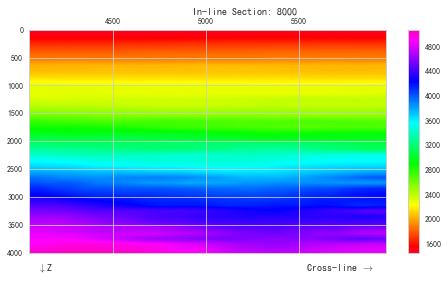

In [9]:
fig_vel, ax_vel = plt.subplots()

im = vel_cube.plot(
    ppp.InlineIndex(8000), ax_vel, kind='img', cm='gist_rainbow')
fig_vel.colorbar(im)
fig_vel.set(figwidth=8)

[None]

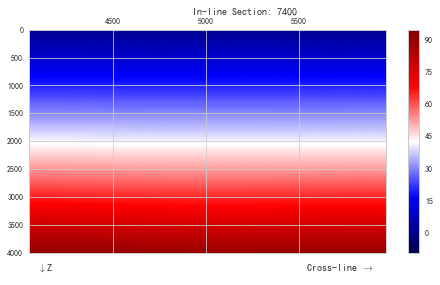

In [10]:
fig, ax = plt.subplots()
im = obp_cube.plot(ppp.InlineIndex(7400), ax, kind='img')
fig.colorbar(im)
fig.set(figwidth=8)

Pressure Prediction with Bowers method:

In [11]:
bowers_cube = ppp.bowers_seis(
    "bowers_new", obp_cube, vel_cube, 
    upper=survey.horizons['T16'], lower=survey.horizons['T20'], 
    mode='optimize')

View predicted pressure section:

[None]

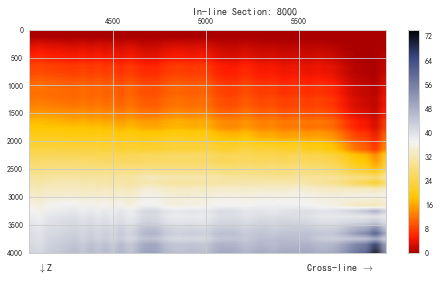

In [12]:
from pygeopressure.basic.vawt import opendtect_seismic_colormap

fig_pres, ax_pres = plt.subplots()

im = bowers_cube.plot(
    ppp.InlineIndex(8000), ax_pres, 
    kind='img', cm=opendtect_seismic_colormap())

fig_pres.colorbar(im)
fig_pres.set(figwidth=8)